In [1]:
import os
import sys
import librosa
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0,'../scripts/')
from data_loader import DataLoader
from resize_audio import resize_audio

In [2]:
dl = DataLoader()

In [3]:
# Path to be replaced
train_audio_path = '../train/wav/'

Load 100 audios

In [4]:
audios, max_duration = dl.load_audios(train_audio_path,44100,False,100)

Plot the durations of the hundred audio files

(array([24., 34., 18., 10.,  9.,  2.,  1.,  2.,  0.,  1.]),
 array([ 2.30401361,  3.99361224,  5.68321088,  7.37280952,  9.06240816,
        10.7520068 , 12.44160544, 14.13120408, 15.82080272, 17.51040136,
        19.2       ]),
 <BarContainer object of 10 artists>)

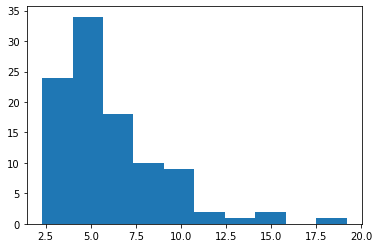

In [5]:
durations = []
labels = os.listdir(train_audio_path)
for i,label in enumerate(labels):
    if i > 100:
        break
    samples, sample_rate = librosa.load(train_audio_path+label, sr=44100, mono=False)
    durations.append(len(samples)/sample_rate)
durations = np.array(durations)
plt.hist(durations)

In [7]:
def resize_audio(audios,max_duration):
    resized_audios = {}
    for label in audios:
        resized_audios[label] = librosa.util.fix_length(audios[label],size=int(max_duration*44100))
    return resized_audios

In [6]:
resized_audios = resize_audio(audios,max_duration)

In [7]:
import IPython.display as ipd

Comparing two sample audios. The first is resized the second one is the original.

In [8]:
ipd.Audio(list(resized_audios.values())[2], rate=44100)

In [9]:
ipd.Audio(list(audios.values())[2], rate=44100)